/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


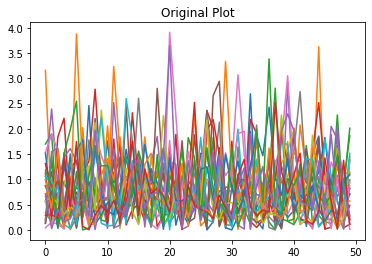

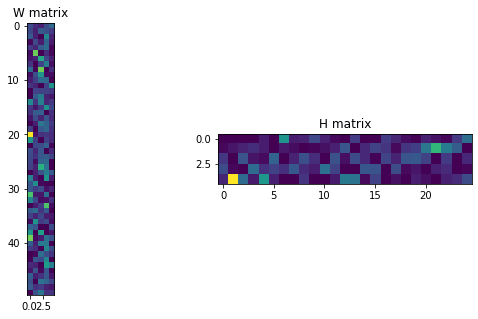

Text(0.5, 1.0, 'Reconstructed Image')

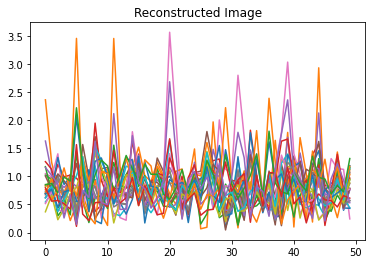

In [1]:
# Importing important packages
import numpy as np
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

# Generate a random matrix with non-negative entries
X = np.abs(np.random.randn(50, 25))

# Perform NMF with 5 components
model = NMF(n_components=5, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

#Visualization of main data points
plt.plot(X)
plt.title('Original Plot')

# Visualize the factor matrices
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].imshow(W, cmap='viridis')
axs[0].set_title('W matrix')
axs[1].imshow(H, cmap='viridis')
axs[1].set_title('H matrix')
plt.show()

# Reconstructed the image using W & H
new_img = W.dot(H)
plt.plot(new_img)
plt.title("Reconstructed Image")

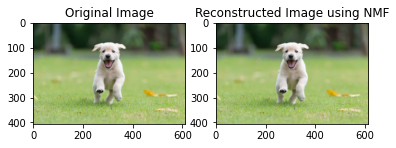

In [2]:
# Importing important packages
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from skimage import io, img_as_float

# Loading image
image = io.imread('dog_image.jpg')

# Converting to float
image = img_as_float(image)

# Flatten image
X = image.reshape((-1, image.shape[-1]))

# Define the number of components
rank = 5

# Apply NMF to find W & H matrices
model = NMF(n_components=rank, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

# Reconstruct the image
X_approx = W.dot(H)
image_approx = X_approx.reshape(image.shape)

# Display the original and reconstructed images
fig, ax = plt.subplots(1, 2)

# Original Image
ax[0].imshow(image)
ax[0].set_title('Original Image')

# Reconstructed Image
ax[1].imshow(image_approx)
ax[1].set_title('Reconstructed Image using NMF')
plt.show()


In [3]:
# Importing important packages
import numpy as np
from sklearn.decomposition import NMF
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img = Image.open('dog_image.jpg')
img_array = np.array(img)

# Flatten the image into a 2D array
rows, cols, channels = img_array.shape
X = img_array.reshape(rows * cols, channels)

# Perform NMF
rank = 10  # Specify the rank for the NMF
nmf = NMF(n_components=rank, init='random', random_state=0)
# Creating vectors matrix
W = nmf.fit_transform(X)

# Creating cofficient matrix
H = nmf.components_

# Reconstruct the image using the NMF components
X_approx = np.dot(W, H)
img_reconstructed = np.uint8(np.clip(X_approx.reshape(rows, cols, channels), 0, 255))


# Save the reconstructed image
Image.fromarray(img_reconstructed).save('reconstructed_image_rank{}.jpg'.format(rank))
